<a href="https://colab.research.google.com/github/cchiayik/Impurity-Analysis-Case-Study/blob/main/Impurity_Analysis_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MIT License

Copyright (c) [2025] [Chew Chia Yik]

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files ("Impurity Analysis Case Study"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

# ⚛Title: Case Study for Impurity Across Different Reactor

# 1) Business Context
In chemical manufacturing, maintaining product quality is critical—especially when it comes to controlling impurity levels in final output. This case study explores a real-world scenario involving a chemical plant that operates under varying catalyst concentrations, reaction temperatures, and reactor configurations across multiple shifts.



# 2) Objective
The goal of this analysis is to determine how these process parameters interact and influence impurity levels. By applying statistical modeling techniques such as linear regression, interaction terms, and variance inflation factor (VIF) analysis, this project seeks to:


1.   Identify key variables that significantly affect impurity formation
2.   Quantify the interaction effects between operational conditions and time (shift)

3.  Provide actionable insights for process optimization and quality control


This notebook demonstrates not only data cleaning and exploratory data analysis (EDA), but also the application of design of experiment (DOE) principles and statistical diagnostics to evaluate model robustness.

The project serves both as a practical case study in industrial data science and as a portfolio piece highlighting proficiency in:


*   Python (pandas, seaborn, statsmodels, matplotlib)

*   Data visualization

*   Regression analysis

*   Real-world problem-solving in the chemical engineering domain

#Library Import, File Uploading and Data Overview  

In [ ]:
# --------------------------------------------------------
# Impurity Analysis Case Study
# Created by Chew Chia Yik, 2025
# This code is NOT authorized for reuse without permission.
# --------------------------------------------------------

import pandas as pd
import statsmodels.formula.api as smf
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
uploaded = files.upload()  #for use to upload file ("Impurity.csv" for this case)
pd.set_option('display.max_columns', None) #to display whole table, python might hide some columns while displaying
df = pd.read_csv("Impurity.csv") #read the file "Impurity.csv"
headers= ["Batch","Day","Impurity",
          "Temp","CatalystConc","ReactionTime",
          "Reactor","Shift"] #listing the header naming
df.columns = headers

print(df.head(10))
# Ensure categorical types for 'Reactor and 'Shift'
df['Reactor'] = df['Reactor'].astype('category')
df['Shift'] = df['Shift'].astype('category')



Saving Impurity.csv to Impurity.csv
   Batch  Day  Impurity       Temp  CatalystConc  ReactionTime  Reactor  Shift
0      1    1  4.821711  26.741151      1.476401     90.685421        1      1
1      2    1  6.533581  28.032053      1.357642     89.779284        2      1
2      3    1  6.059677  26.942152      1.328002     93.691197        2      2
3      4    1  5.409098  27.805012      1.831380     90.181228        1      2
4      5    1  6.973502  28.103369      1.723617     90.537639        2      1
5      6    1  7.155945  27.045975      1.723936     90.354718        3      1
6      7    1  8.367256  27.294557      2.088267     93.130863        3      2
7      8    1  4.244544  26.396178      1.275779     89.339933        1      1
8      9    1  5.140315  26.739457      0.760775     88.888934        2      2
9     10    1  7.125817  27.915732      1.710026     92.636570        3      2


Showcasing how the dataframe looks like by printing top 10 rows

In [ ]:
print(df.info())
#count the non-null (non-missing data) and type of data ineach column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Batch         100 non-null    int64   
 1   Day           100 non-null    int64   
 2   Impurity      100 non-null    float64 
 3   Temp          100 non-null    float64 
 4   CatalystConc  100 non-null    float64 
 5   ReactionTime  100 non-null    float64 
 6   Reactor       100 non-null    category
 7   Shift         100 non-null    category
dtypes: category(2), float64(4), int64(2)
memory usage: 5.3 KB
None


Non-Null Count is the count of non-missing data, useful for comparison with Range Index (the total count of row) to detect any missing data.
Dtype returns the type of value of the column, for example Dtype for column "Batch" is "int64", indicating the batch is integer while Impurity,Temp, CatalystConc and ReactionTime is float as indicated by Dtype of 'float64'. While the 'Reactor' and 'Shift' is category type.

In [ ]:
print(df.describe())
#display the statistic summary of each column

            Batch         Day    Impurity        Temp  CatalystConc  \
count  100.000000  100.000000  100.000000  100.000000    100.000000   
mean    50.500000    5.500000    6.123247   27.466943      1.478969   
std     29.011492    2.886751    1.514195    0.718316      0.442267   
min      1.000000    1.000000    3.078245   25.963304      0.760775   
25%     25.750000    3.000000    4.998902   26.930973      1.120750   
50%     50.500000    5.500000    5.862069   27.449499      1.456567   
75%     75.250000    8.000000    7.057342   27.866653      1.734097   
max    100.000000   10.000000   10.535015   29.457753      2.636275   

       ReactionTime  
count    100.000000  
mean      91.008631  
std        1.454411  
min       88.456196  
25%       89.881573  
50%       90.954583  
75%       92.009322  
max       95.049382  


df.describe() displays the statistic summary such as county, mean standard deviation, min, max and interquartile range.


# Correlation and HeatMap Illustration

In [ ]:
corr = df.corr() #display correlation of all variable in the dataframe
corr


,Batch,Day,Impurity,Temp,CatalystConc,ReactionTime,Reactor,Shift
Batch,1.000000,9.950372e-01,-0.072293,-0.002598,-0.157802,0.097891,-0.035342,3.672131e-02
Day,0.995037,1.000000e+00,-0.059171,0.010137,-0.143860,0.100015,-0.031903,9.276721e-18
Impurity,-0.072293,-5.917136e-02,1.000000,0.746258,0.838130,0.021678,0.557461,7.950433e-03
Temp,-0.002598,1.013654e-02,0.746258,1.000000,0.604823,0.020681,0.351712,-2.725486e-02
CatalystConc,-0.157802,-1.438597e-01,0.838130,0.604823,1.000000,0.059971,0.485392,7.912198e-02
ReactionTime,0.097891,1.000147e-01,0.021678,0.020681,0.059971,1.000000,-0.030561,2.667615e-02
Reactor,-0.035342,-3.190284e-02,0.557461,0.351712,0.485392,-0.030561,1.000000,3.665357e-02
Shift,0.036721,9.276721e-18,0.007950,-0.027255,0.079122,0.026676,0.036654,1.000000e+00


This table displays the correlation between each variable. Correlation ranges from -1 to 1. The closer the correlation to "1", indicates positive correlation between variables and vice versa. However, the closer the correlation to "0", indicates the variables has less or no correlation. For instance, the correlation between Impurity and Temp is "0.746258" indicates a significant high postive correlation beteen Impurity and Temp. To better illustrates the correlation, we will plot the correlation as heatmap. (*Remarks: perfect 1.0 exists due to the same variable used as both x and y variable such as "Batch" to "Batch")

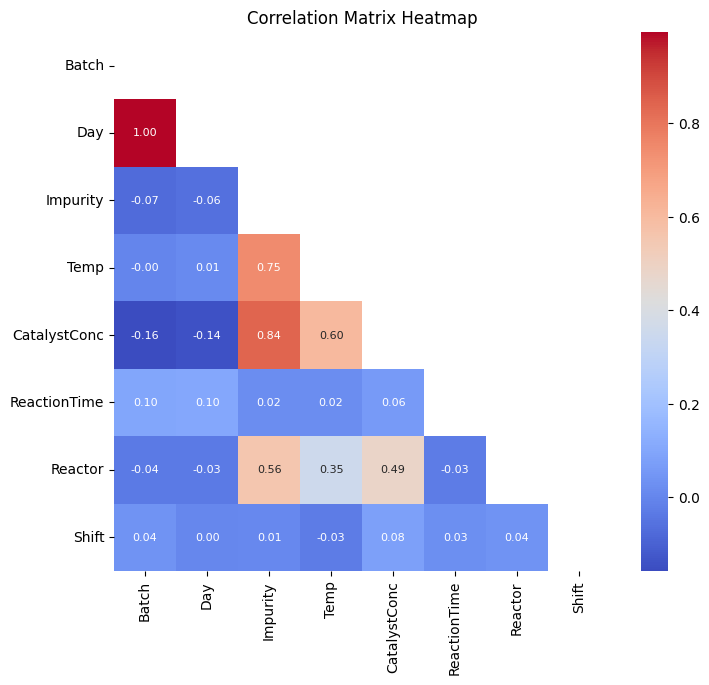

In [ ]:
#plotting heatmap with correlation
import numpy as np
plt.figure(figsize=(8, 7)) #  Adjust figure size
mask = np.triu(np.ones_like(corr, dtype=bool)) #to mask the upper right part to reduce repetitive data
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8}, mask=mask)
# - annot=True: shows values on the cells
# - cmap='coolwarm': color gradient from blue (negative) to red (positive)
# - fmt=".2f": format numbers to 2 decimal places
# - annot_kws: sets font size of text inside the cells
plt.title('Correlation Matrix Heatmap') #graph title
plt.show()

Now, the correlation is easier for understanding with heatmap illustration, where blue colour indicates low correlation, dark blue indicates negative correlation and red colour indicates postive correalrion. Some of the significant correlation are "Impurity : Temp", "Impurity : CatalystConc", "CatalystConc:Temp" with strong correlation. The "Reactor" seems to have moderate postive correlation with "Impurity, "Temp" and "CatalystConc". Evident that different runs at different operating condition whihc lead to different impurity level.

# Pairplot

Text(0.5, 1.02, 'Pairplot of All Numeric Variables')

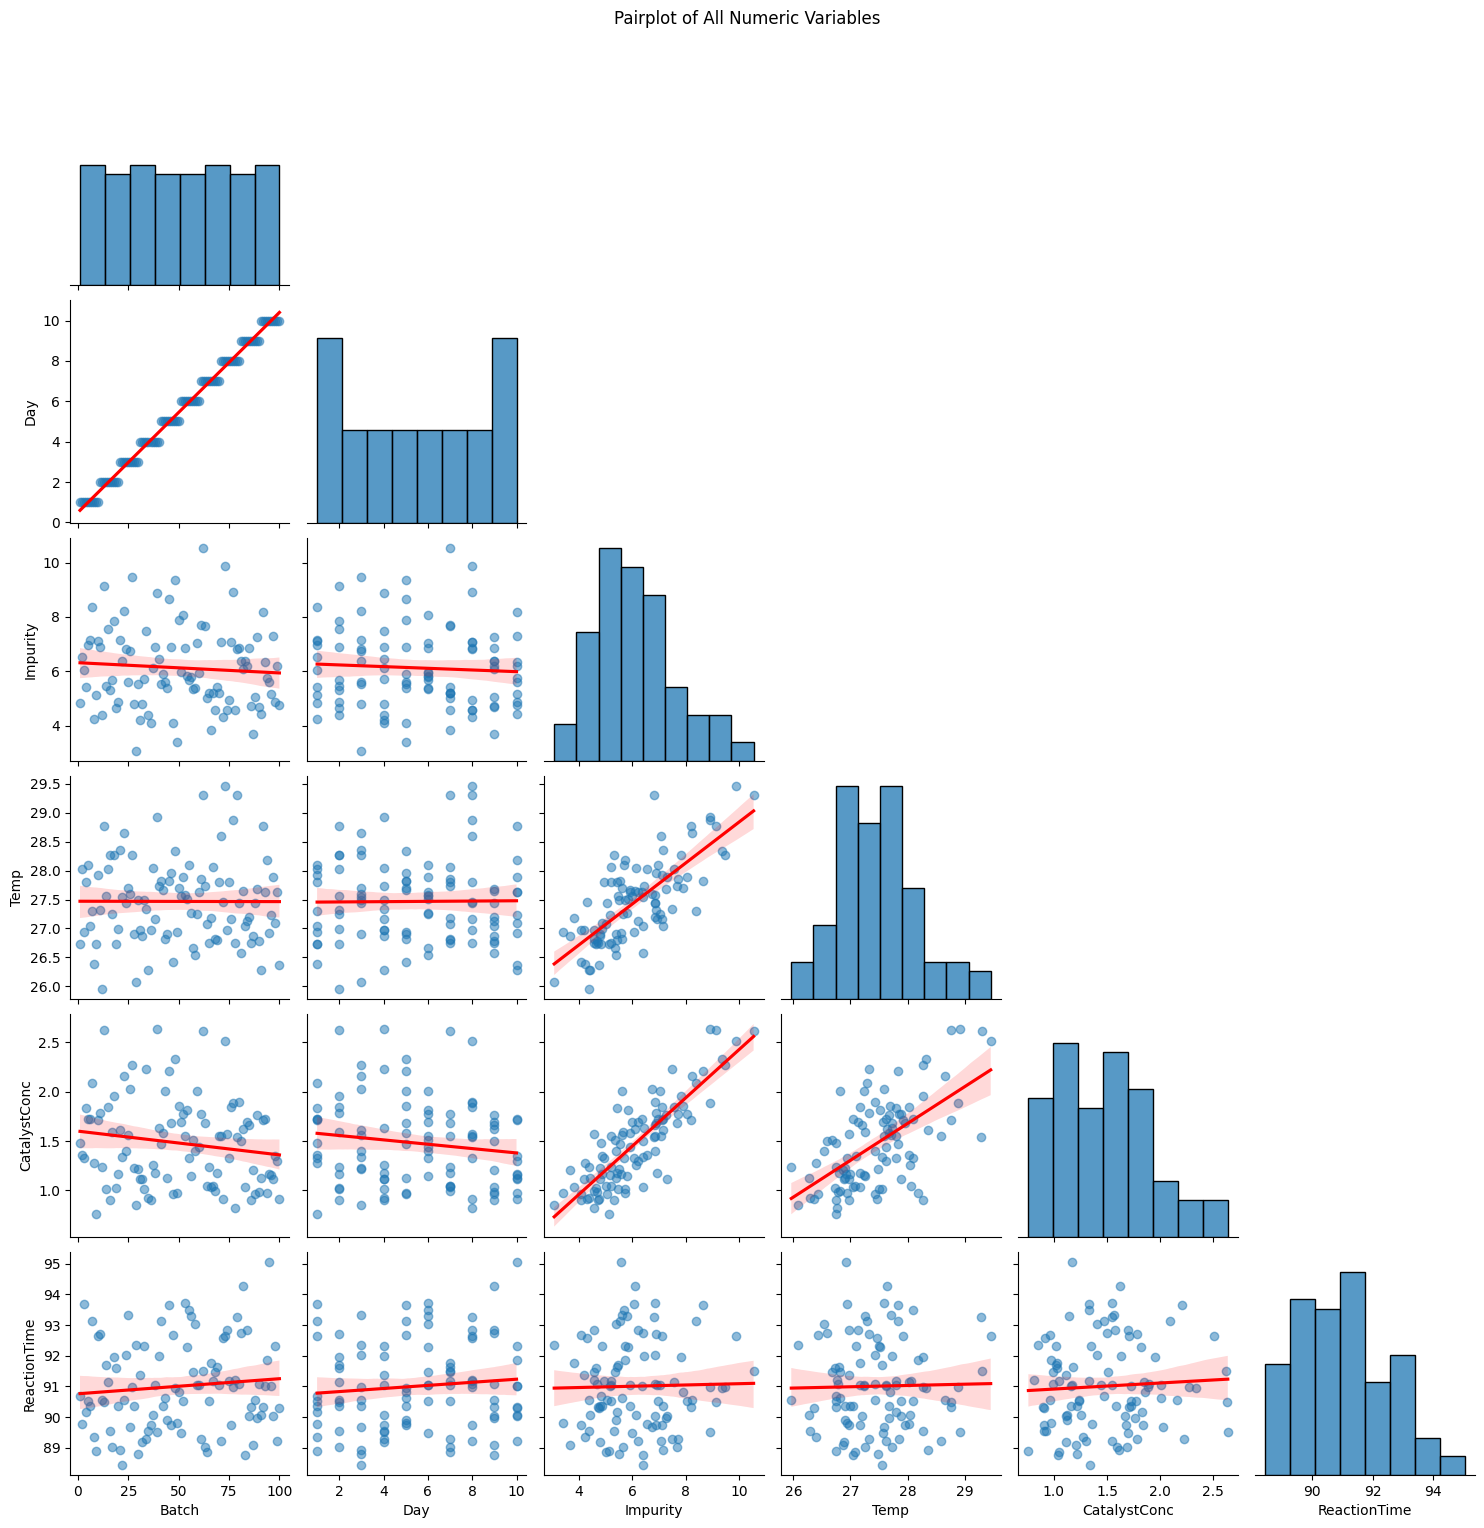

In [ ]:
sns.pairplot(df,kind="reg",
    plot_kws={'line_kws': {'color': 'red'}, 'scatter_kws': {'alpha': 0.5}},
             corner=True) #corner is to cut off the pairplot into a right triangle as the other half is just same
plt.suptitle("Pairplot of All Numeric Variables", y=1.02) #y=1.02 is the position of the tile

This plot is compacted regression line for every variable as seen in heat map. Pairplot allows more detailed illustration for data analyst.

# Box Plot of Impurity vs Reactors

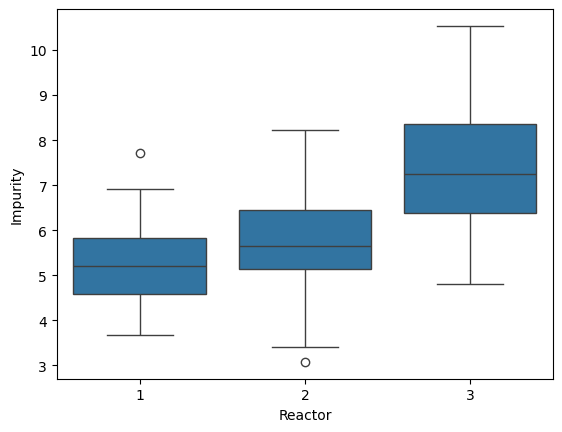

In [ ]:
#boxplot of Impurity vs Reactor
sns.boxplot(x='Reactor',y= 'Impurity',data=df)
plt.show()


From Reactor 1 to 3, the impurity in an upward trend. The Reactor 1 boxplot has the shortest whisker, indicates a narrow spread or variance of impurity. Reactor 1 has 1 outlier point above the whisker possibly due to special cause. The Reactor 3 has the highest impurity out of all reactors, with larger whisker indicating higher spread and instability within. Special care and supervision is required for Reactor 3 due to highest impurity and instability of process within.


# Modelling

In [ ]:
# Build the model
import statsmodels.formula.api as smf
model = smf.ols('Impurity ~ CatalystConc + Temp +Temp:ReactionTime + CatalystConc:ReactionTime + C(Reactor) + C(Reactor):C(Shift)', data=df).fit()

# Summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               Impurity   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     51.17
Date:                Sun, 27 Jul 2025   Prob (F-statistic):           1.36e-31
Time:                        12:45:29   Log-Likelihood:                -92.324
No. Observations:                 100   AIC:                             204.6
Df Residuals:                      90   BIC:                             230.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

The model yields an R-squared value of 0.837 and adjusted R-squared of 0.82, indicating a strong fit and that the independent variables explain a substantial portion of the variation in impurity levels. A high F-statistic and a low Prob(F) value further support the overall significance of the regression model. Additionally, the low p-values (P>|t|) for each variable suggest that their individual effects on the response are statistically significant. It is worth noting that the condition number is relatively high, around 440000, which may point to multicollinearity. However, given that the model represents underlying physical and chemical reactions, such a condition number is not unexpected.

# Actual vs Predicted Plot

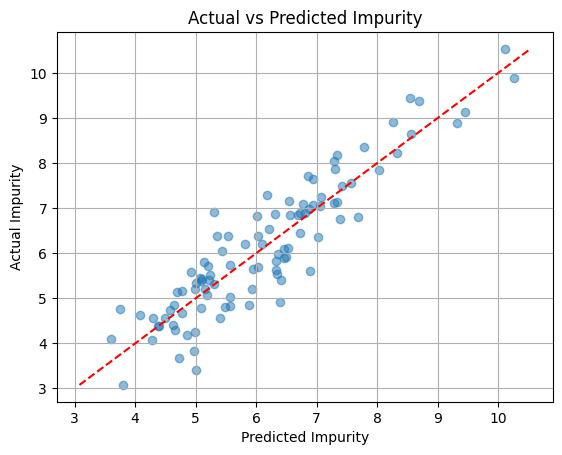

In [ ]:
plt.scatter(model.fittedvalues, df['Impurity'], alpha=0.5)
plt.plot([df['Impurity'].min(), df['Impurity'].max()], #the range of impurity as x -axis
         [df['Impurity'].min(), df['Impurity'].max()], #the range of impurity at y-axis, plot a line of y=x
         color='red', linestyle='--')
plt.xlabel('Predicted Impurity')
plt.ylabel('Actual Impurity')
plt.title('Actual vs Predicted Impurity')
plt.grid(True)
plt.show()


The actual vs predicted plot shows that the model is well fitted with balanced variance and bias.

# Actual vs Fitted Plot

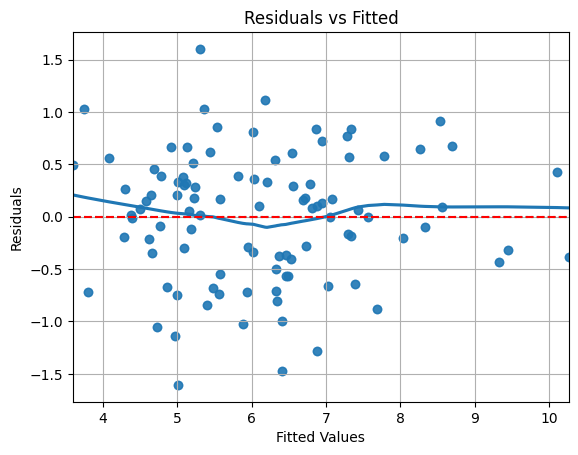

In [ ]:
residuals = model.resid # define the residual
fitted = model.fittedvalues  #define the fitted value

plt.scatter(fitted, residuals, alpha=0.5)
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True)
plt.axhline(0, color='red', linestyle='--') #plot horizontal line at y=0 , red colour, dashed
#labelling at x axis, y axis, title
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.grid(True) #display grid line
plt.show()


The random scattering of the residual observed in this residual vs fitted plot indicates that the model assumptions of linearity and constant variance are likely met.  There is no heteroscedasticity (non constant variance) as no funnel shape is observed.

# R squared of Reactor 1,2 and 3

In [ ]:
for reactor, group in df.groupby('Reactor', observed=False):  #create loop ,groupby filter the data by 'Reactor',  'group' is the list of 'Reactors', 'reactor' is the element of the list
    print(f"\nR^2 for Reactor {reactor}")
    model = smf.ols('Impurity ~ CatalystConc + Temp +Temp:ReactionTime + CatalystConc:ReactionTime + C(Reactor) + C(Reactor):C(Shift)', data=group).fit()
    print("R-squared:", round(model.rsquared,4))  #.rsquared return the value of R^2 of each reactor in the model


R^2 for Reactor 1
R-squared: 0.6073

R^2 for Reactor 2
R-squared: 0.7861

R^2 for Reactor 3
R-squared: 0.8202


Reactor 2 and 3 shows high R squared value, indicating both reactors are well fitted with the model. However the R^2 for Reactor 1 is only 0.6072, lowest among all reactors. This reason might due to less variation in inputs in Reactor 1 as we observed in the boxplot, making temperature and catalyst concentration weak predictors for Reactor 1. There's little variation in Reactor to explain, but not necessarily a "bad" model

# Actual vs Fitted for Reactor 1,2 and 3


Model for Reactor 1


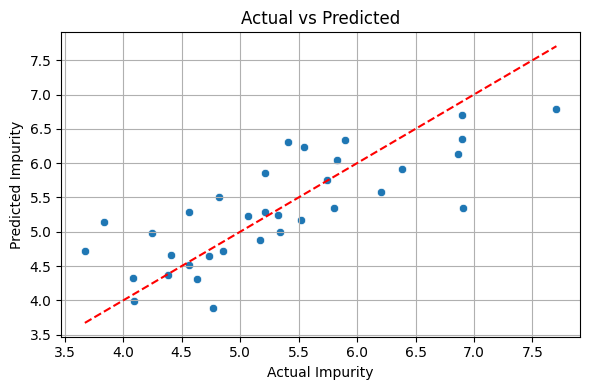


Model for Reactor 2


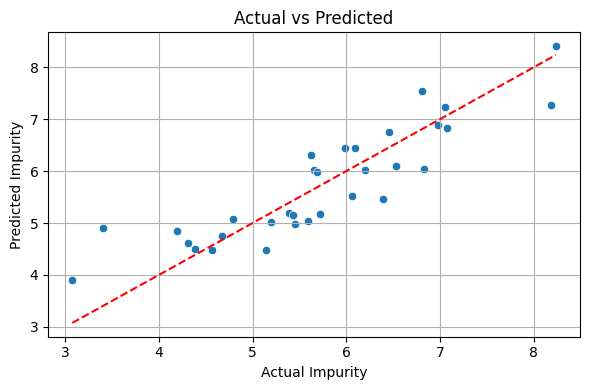


Model for Reactor 3


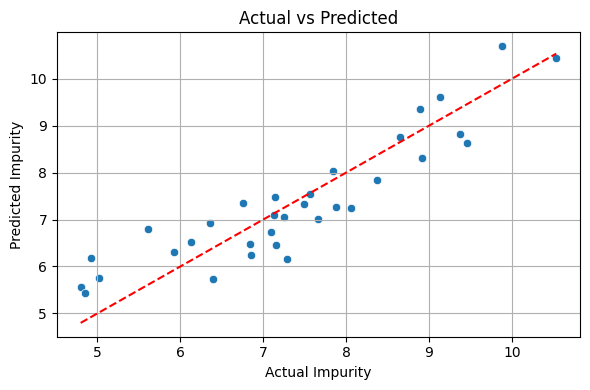

In [ ]:
for reactor, group in df.groupby('Reactor', observed=False):
    print(f"\nModel for Reactor {reactor}")
    model = smf.ols('Impurity ~ CatalystConc + Temp +Temp:ReactionTime + CatalystConc:ReactionTime + C(Reactor) + C(Reactor):C(Shift)', data=group).fit()
    # Predicted values
    predicted = model.fittedvalues
    # Actual values
    actual = group['Impurity']
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=actual, y=predicted)
    plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'r--')  # identity line
    plt.xlabel('Actual Impurity')
    plt.ylabel('Predicted Impurity')
    plt.title('Actual vs Predicted')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Residual vs Fitted for Reactor 1,2 and 3


Model for Reactor 1


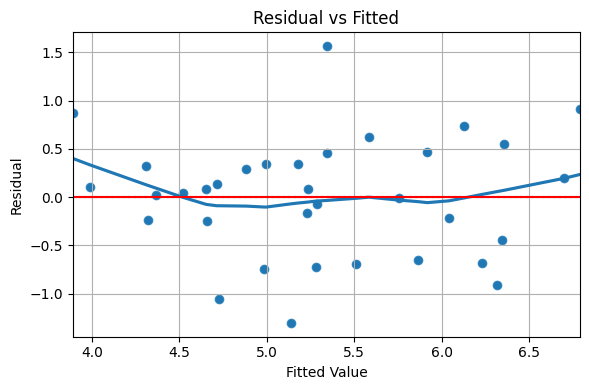


Model for Reactor 2


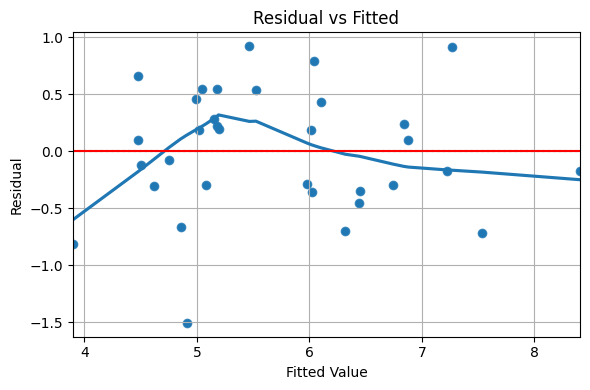


Model for Reactor 3


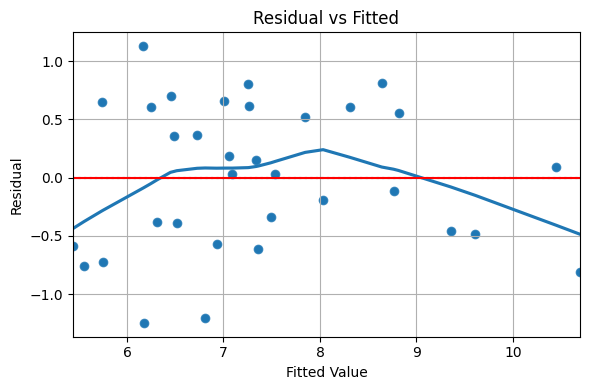

In [ ]:
import matplotlib.pyplot as plt #import matplotlib for graph plotting


for reactor, group in df.groupby('Reactor',observed=False):
    print(f"\nModel for Reactor {reactor}")
    model = smf.ols('Impurity ~ CatalystConc + Temp +Temp:ReactionTime + CatalystConc:ReactionTime + C(Reactor) + C(Reactor):C(Shift)', data=group).fit()
    # Predicted values
    predicted = model.fittedvalues
    residuals = model.resid
    # Actual values
    actual = group['Impurity']

    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=predicted, y=residuals)
    sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True)
    plt.axhline(0, color='red')
    plt.xlabel('Fitted Value')
    plt.ylabel('Residual')
    plt.title('Residual vs Fitted')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Residual Diagnostics (Per Reactor):
While the residuals vs. fitted plot for the combined dataset appears reasonably random and homoscedastic, a reactor-wise breakdown reveals evident signs of non-linearity and heteroscedasticity, especially for Reactor 2 and Reactor 3. This discrepancy indicates that the global linear model, though acceptable at an aggregate level, fails to capture reactor-specific patterns—suggesting the presence of underlying non-linear dynamics, reactor-dependent effects, or missing interaction terms. These findings highlight the importance of granular model diagnostics in multi-system environments.

#Variance Inflaction Factor (VIF)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices  #patsy is used to build design matrices (X, y) from a formula
#dmatrices build a design matrix from the terms in the model
y, X = dmatrices('Impurity ~ CatalystConc + Temp + Temp:ReactionTime + CatalystConc:ReactionTime + C(Reactor) + C(Reactor):C(Shift)', data=df, return_type='dataframe')
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])] #compute the VIF for all the columns in the matrix X
vif["Variable"] = X.columns
print(vif)


           VIF                     Variable
0  2158.794369                    Intercept
1     2.584816              C(Reactor)[T.2]
2     3.220853              C(Reactor)[T.3]
3     1.680487  C(Reactor)[1]:C(Shift)[T.2]
4     1.569742  C(Reactor)[2]:C(Shift)[T.2]
5     1.867602  C(Reactor)[3]:C(Shift)[T.2]
6  5958.451579                 CatalystConc
7    49.354577                         Temp
8    67.394611            Temp:ReactionTime
9  6023.274842    CatalystConc:ReactionTime


Variance Inflation Factor (VIF) analysis reveals severe multicollinearity among CatalystConc, Temp, and their respective interaction terms. In particular, CatalystConc and CatalystConc:ReactionTime show VIFs exceeding 5000, suggesting near-linear dependence.

This is likely due to the narrow range of CatalystConc values, which limits the variability available for reliable estimation in the presence of interaction terms. High VIFs reduce model interpretability and can inflate standard errors of coefficients, potentially compromising inference.

# Data Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

# Copy numeric variables
numeric_cols = ['Temp', 'CatalystConc', 'ReactionTime']
scaler = StandardScaler()
df_scaled = df.copy() #making a duplicate of the original DataFrame, to safely scale values in df_scaled without losing or altering the original raw data.
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])
model_scaled = smf.ols('Impurity ~ CatalystConc + Temp + Temp:ReactionTime + CatalystConc:ReactionTime + C(Reactor) + C(Reactor):C(Shift)', data=df_scaled).fit()
print(model_scaled.summary())

from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

y, X = dmatrices('Impurity ~ CatalystConc + Temp + Temp:ReactionTime + CatalystConc:ReactionTime + C(Reactor) + C(Reactor):C(Shift)', data=df_scaled, return_type='dataframe')
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Variable"] = X.columns
print(vif)


                            OLS Regression Results                            
Dep. Variable:               Impurity   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     56.30
Date:                Sun, 27 Jul 2025   Prob (F-statistic):           3.82e-33
Time:                        12:45:30   Log-Likelihood:                -88.296
No. Observations:                 100   AIC:                             196.6
Df Residuals:                      90   BIC:                             222.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

Standardizing continuous features reduced multicollinearity significantly (VIFs < 5 across all variables), especially for interaction terms. After standardization, key interactions such as Temp:ReactionTime and CatalystConc:ReactionTime emerged as significant, indicating critical non-linear behavior in process dynamics.

# Optimisation (Minimize the Impurity for Reactor 1 Shift 1)

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from scipy.optimize import minimize

model = smf.ols('Impurity ~ CatalystConc + Temp + Temp:ReactionTime + CatalystConc:ReactionTime + C(Reactor) + C(Reactor):C(Shift)', data=df).fit()

# Function to predict impurity based on numeric inputs
def predict_impurity(x):
    # Unpack inputs
    catalyst_conc, temp, reaction_time = x

    #create input dataframe
    input_data = pd.DataFrame({
        'CatalystConc': [catalyst_conc],
        'Temp': [temp],
        'ReactionTime': [reaction_time],
        'Reactor': [1],
        'Shift': [1] # Set fixed Reactor and Shift level (e.g., Reactor = 1, Shift = 1)
    })

    try:
        pred = model.predict(input_data)  #predict the value with the model
        return pred[0]  # Return as scalar for minimize
    except:
        return np.inf  # If prediction fails, return large number (.inf = infinity)
#try and except is important to avoid crashing the optimsation loop when dealing with missing data or worng data type

# Define bounds for each variable: (min, max)
bounds = [
    (df['CatalystConc'].min(), df['CatalystConc'].max()),
    (df['Temp'].min(), df['Temp'].max()),
    (df['ReactionTime'].min(), df['ReactionTime'].max())
]

# Initial guess (can be anything, but generally use mean of each numerical variable)
x0 = [df['CatalystConc'].mean(), df['Temp'].mean(), df['ReactionTime'].mean()]

# Run optimization (minimize impurity), optimisation is a built in loop
result = minimize(predict_impurity, x0=x0, bounds=bounds)

# Display result
print("Optimized Inputs for Reactor 1 Shift 1:")
print(f"Catalyst Conc: {result.x[0]:.3f}")
print(f"Temp: {result.x[1]:.2f}")
print(f"Reaction Time: {result.x[2]:.2f}")
print(f"Predicted Minimum Impurity: {predict_impurity(result.x):.4f}")


Optimized Inputs:
Catalyst Conc: 0.761
Temp: 25.96
Reaction Time: 95.05
Predicted Minimum Impurity: 2.9545


The code succesfully optimise the condition required (temperature, catalyst concentrationa and reaction time) for the smallest impurity in Reactor 1 and Shift 1 with the model built.

# 📏 Limitations & Future Improvements
While interaction terms (e.g., CatalystConc:ReactionTime, Temp:ReactionTime, C(Reactor):C(Shift)) have been included to account for potential synergistic effects, residual analysis by reactor suggests that the linear model still fails to fully capture underlying patterns — especially in Reactor 2 and 3. This indicates potential non-linear relationships or reactor-specific dynamics not addressed by the current approach.

Future improvements could involve:

* Developing separate models per reactor to account for distinct process behaviors.

* Exploring non-linear regression methods (e.g., polynomial features, tree-based models) to better fit local patterns.

* Including process-specific covariates or external factors if available (e.g., feedstock variability, maintenance schedule).

This reflection demonstrates both critical evaluation of model performance and readiness to iterate — a core trait in real-world data modeling.

# 🧪 Conclusion
This case study illustrates the ability to tackle complex, multivariable problems in a real industrial context—where ideal data rarely exists, and variation between equipment and operations is inevitable.

Despite overall model validity when all reactors are combined, reactor-specific residual patterns revealed non-linearity and heteroscedasticity, particularly in Reactor 2 and Reactor 3. These findings underscore the importance of diagnostic checks beyond global R² values, highlighting potential differences in reactor dynamics that could affect impurity formation under certain shifts and conditions.

Key outcomes:

* Identified significant interaction effects between Reaction Time, Temperature, and Catalyst Concentration

* Detected inconsistencies between combined and segmented model performance, prompting further investigation into reactor-specific behaviors

* Demonstrated practical application of statistical modeling, residual analysis, and domain understanding to guide decision-making in manufacturing

This project reflects a data-driven mindset, technical fluency in Python and regression modeling, and a strong grasp of the real-world implications of analytical results—making it not just an academic exercise, but a business-relevant problem-solving showcase.

#Reference
SAS, 2025. JMP Virtual Lab. Available at: https://vle.sas.com/course/view.php?id=13039